# Sentiment Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


**Download data to tag entities**

In [4]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\caro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\caro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\caro\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\caro\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

**Read Reviews**

In [6]:
# Read in data
df = pd.read_csv('./Dataset/Yelp_reviews_final.csv', delimiter=';')
print(df.shape)
#df = df.head(500)
#print(df.shape)

(1481665, 8)


In [9]:
df.head()

,id_reviews,id_user,id_source,stars,id_date,review,likes,source
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,Had a party of 6 here for hibachi. Our waitres...,0,1
1,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,"Great place for breakfast! I had the waffle, w...",0,1
2,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4,0,"Yes, this is the only sushi place in town. How...",0,1
3,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,"Great burgers,fries and salad! Burgers have a...",0,1
4,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,What a great addition to the Funk Zone! Grab ...,0,1


**EDA** Vemos la cantidad de reviews por calificación de estrellas

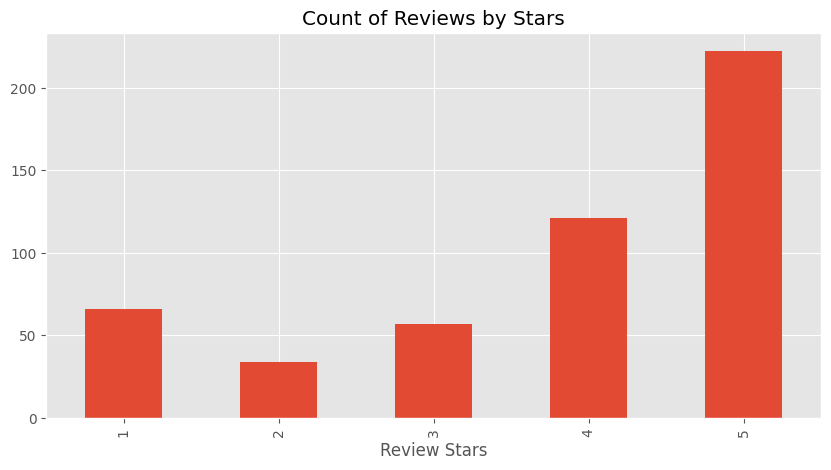

In [10]:
ax = df['stars'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

**Basic nltk**

In [11]:
example = df['review'][50]
print(example)

Great bar Happy Hour 4-7 every day. Wine & Drafts $3, $5 pizza, $4.50 apps. To-go Dinners and lunches are very reasonable and fast. Staff are as friendly as it gets.


**Split in tokens**

In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Great', 'bar', 'Happy', 'Hour', '4-7', 'every', 'day', '.', 'Wine', '&']

**Find the part of the speech**

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Great', 'NNP'),
 ('bar', 'NN'),
 ('Happy', 'NNP'),
 ('Hour', 'NNP'),
 ('4-7', 'JJ'),
 ('every', 'DT'),
 ('day', 'NN'),
 ('.', '.'),
 ('Wine', 'NNP'),
 ('&', 'CC')]

**Group By tagged**

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/NNP)
  bar/NN
  (PERSON Happy/NNP Hour/NNP)
  4-7/JJ
  every/DT
  day/NN
  ./.
  Wine/NNP
  &/CC
  Drafts/NNP
  $/$
  3/CD
  ,/,
  $/$
  5/CD
  pizza/NN
  ,/,
  $/$
  4.50/CD
  apps/NN
  ./.
  To-go/JJ
  (ORGANIZATION Dinners/NNPS)
  and/CC
  lunches/NNS
  are/VBP
  very/RB
  reasonable/JJ
  and/CC
  fast/JJ
  ./.
  Staff/NNP
  are/VBP
  as/RB
  friendly/JJ
  as/IN
  it/PRP
  gets/VBZ
  ./.)


# Model 1. VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg(ative)/neu(tral)/pos(itive) scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\caro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()

**Test Polarity**

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [15]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9001}

In [9]:
# Run the polarity score on the entire dataset
#load scores into a dictionary

res = {}
for i, row in df.iterrows():
    text = row['review']
    myid = i
    res[myid] = sia.polarity_scores(text)

In [17]:
res

{0: {'neg': 0.016, 'neu': 0.743, 'pos': 0.242, 'compound': 0.9782},
 1: {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.9523},
 2: {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9622},
 3: {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.8655},
 4: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9168},
 5: {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.996},
 6: {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8625},
 7: {'neg': 0.198, 'neu': 0.724, 'pos': 0.077, 'compound': -0.9492},
 8: {'neg': 0.007, 'neu': 0.894, 'pos': 0.098, 'compound': 0.9362},
 9: {'neg': 0.009, 'neu': 0.784, 'pos': 0.208, 'compound': 0.9971},
 10: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.8885},
 11: {'neg': 0.124, 'neu': 0.843, 'pos': 0.033, 'compound': -0.8879},
 12: {'neg': 0.036, 'neu': 0.879, 'pos': 0.085, 'compound': 0.2625},
 13: {'neg': 0.128, 'neu': 0.818, 'pos': 0.054, 'compound': -0.4588},
 14: {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound'

In [10]:
#load res into a dataframe vaders
vaders = pd.DataFrame(res).T

#merge to the original dataframe
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)

In [19]:
#Dataframe original plus vaders scores
vaders.head()

,neg,neu,pos,compound,id_reviews,id_user,id_source,stars,id_date,review,likes,source
0,0.016,0.743,0.242,0.9782,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,Had a party of 6 here for hibachi. Our waitres...,0,1
1,0.000,0.574,0.426,0.9523,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,"Great place for breakfast! I had the waffle, w...",0,1
2,0.000,0.739,0.261,0.9622,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4,0,"Yes, this is the only sushi place in town. How...",0,1
3,0.000,0.762,0.238,0.8655,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,"Great burgers,fries and salad! Burgers have a...",0,1
4,0.000,0.719,0.281,0.9168,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,What a great addition to the Funk Zone! Grab ...,0,1


# Plot VADER results

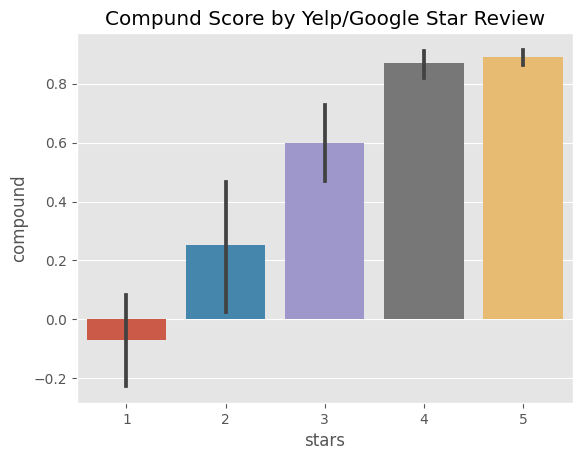

In [20]:
#if it is a 5 stars then it is probably a positive review
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Yelp/Google Star Review')
plt.show()
#1 star have low compound and a 5 stars have a higher compound review

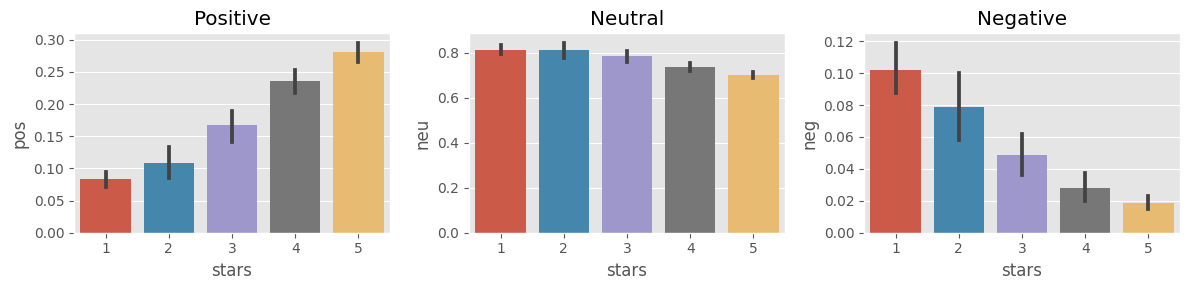

In [21]:
#now we look at positive, negative and neutral scores
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**This model look at each word in the sentence, scored each word in the review individualy. Not include the context of the review, sarcarsm, ironic, etc. This model wouldn't pick up relationshipo between words.**

# Model 2. Roberta Pretrained Model
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [11]:
#import transformers library from Huggingface
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

c:\_CARO\git\Henry-Data\ProyectoFinal\data12-pf-google-yelp\MachineLearning-SentimentAnalysisProyect\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
#download  a model pretrainied
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [19]:
#compare with vader model
# VADER results on example
print(example)
sia.polarity_scores(example)

Great bar Happy Hour 4-7 every day. Wine & Drafts $3, $5 pizza, $4.50 apps. To-go Dinners and lunches are very reasonable and fast. Staff are as friendly as it gets.


{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9001}

In [21]:
# Run for Roberta Model for an example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0009888249, 'roberta_neu': 0.01591682, 'roberta_pos': 0.9830943}


In [13]:
#define a function for roBERTa polarity
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [15]:
#find de roBERTa scores for the whole dataframe
res = {}
for i, row in df.iterrows():
    try:
        text = row['review']
        myid = i
        #vader_result = sia.polarity_scores(text)
        #vader_result_rename = {}
        #for key, value in vader_result.items():
        #    vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        #both = {**vader_result_rename, **roberta_result}
        res[myid] = roberta_result #both
    except Exception as e:
        print(f'Broke for id {myid}')

Broke for id 63
Broke for id 96
Broke for id 111
Broke for id 113
Broke for id 119
Broke for id 139
Broke for id 209
Broke for id 556
Broke for id 707
Broke for id 960
Broke for id 1013
Broke for id 1044
Broke for id 1048
Broke for id 1066
Broke for id 1162
Broke for id 1185
Broke for id 1516
Broke for id 1613
Broke for id 1616
Broke for id 1628
Broke for id 1701
Broke for id 1743
Broke for id 1877
Broke for id 1885
Broke for id 1929
Broke for id 1975
Broke for id 2059
Broke for id 2085
Broke for id 2101
Broke for id 2477
Broke for id 2513
Broke for id 2529
Broke for id 2598
Broke for id 2745
Broke for id 2839
Broke for id 2848
Broke for id 2854
Broke for id 2864
Broke for id 3012
Broke for id 3056
Broke for id 3115
Broke for id 3150
Broke for id 3339
Broke for id 3408
Broke for id 3492
Broke for id 3805
Broke for id 3815
Broke for id 3860
Broke for id 3913
Broke for id 3943
Broke for id 3945
Broke for id 3965
Broke for id 4031
Broke for id 4217
Broke for id 4237
Broke for id 4302
Brok

KeyboardInterrupt: 

In [26]:
#load both scores models in the final DataFrame
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)

In [27]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,id_reviews,id_user,id_source,stars,id_date,review,likes,source
0,0,0.016,0.743,0.242,0.9782,0.049902,0.202282,0.747817,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,Had a party of 6 here for hibachi. Our waitres...,0,1
1,1,0.000,0.574,0.426,0.9523,0.001268,0.006968,0.991764,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,"Great place for breakfast! I had the waffle, w...",0,1
2,2,0.000,0.739,0.261,0.9622,0.001147,0.009198,0.989655,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4,0,"Yes, this is the only sushi place in town. How...",0,1
3,3,0.000,0.762,0.238,0.8655,0.002566,0.030287,0.967147,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,"Great burgers,fries and salad! Burgers have a...",0,1
4,4,0.000,0.719,0.281,0.9168,0.001048,0.007448,0.991504,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5,0,What a great addition to the Funk Zone! Grab ...,0,1


# Compare Scores between models

In [28]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'id_reviews', 'id_user',
       'id_source', 'stars', 'id_date', 'review', 'likes', 'source'],
      dtype='object')

**Combine and compare**

c:\_CARO\git\Henry-Data\ProyectoFinal\data12-pf-google-yelp\MachineLearning-SentimentAnalysisProyect\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


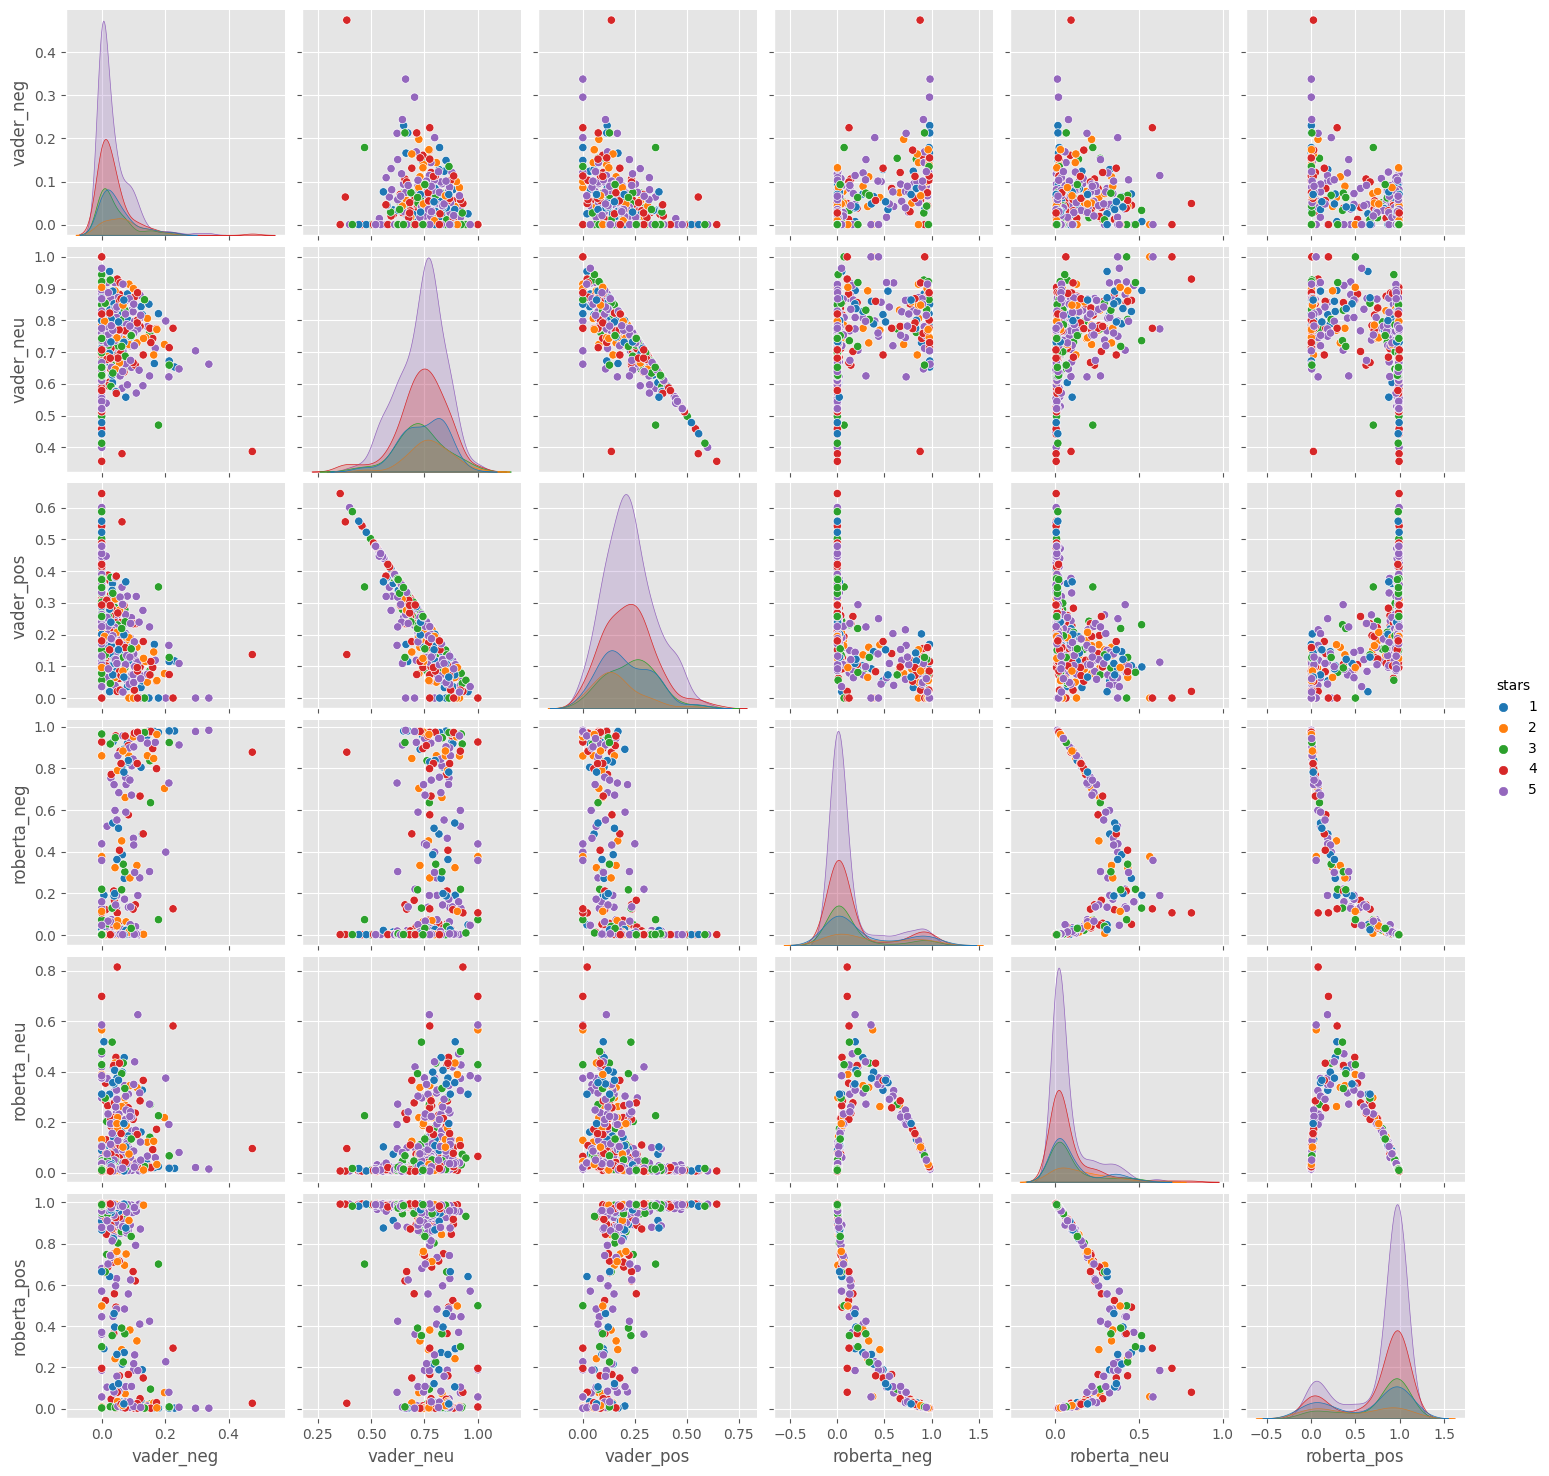

In [29]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

**Export Dataframe to .csv file**

In [31]:
results_df.to_csv('./Dataset/Reviews_SentimentAnalysis.csv', sep=';', index=False)